In [1]:
import matplotlib.pyplot as plt
import numpy as np
from   sklearn.metrics.pairwise import rbf_kernel
from   sklearn.datasets import make_s_curve
from scipy.stats import multivariate_normal

In [2]:
def generate_gaussian(mean, cov, num_samples):
    return np.random.multivariate_normal(mean, cov, num_samples)

In [3]:
def squared_norm_approximation(mean, cov):
    return np.linalg.norm(mean)**2 + np.trace(cov)

In [4]:
def apply_approximation(X, W, norm):
    Z = np.exp(np.dot(W, X) - 0.5 * norm)
    return Z

***q_0, k_0, Sigma_q, Sigma_k all randomized***

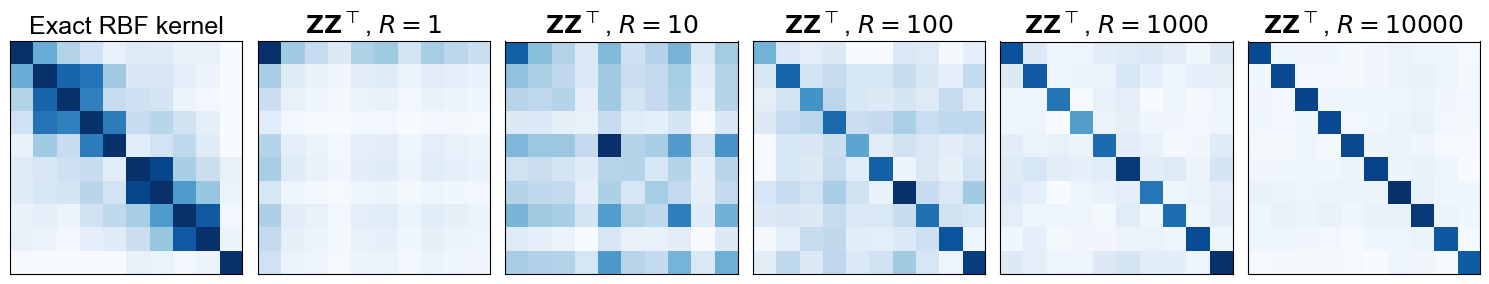

In [6]:
# Reference: https://github.com/gwgundersen/random-fourier-features/blob/master/kernelapprox.py
# Random Feature (Chromanski 2021)

fig, axes = plt.subplots(1, 6)
fig.set_size_inches(15, 4)
font = {'fontname': 'arial', 'fontsize': 18}

N = 1000
D = 10

# randomly generate a distribution mean and std
true_q_mean = np.random.uniform(0, 1, D)
true_k_mean = np.random.uniform(0, 1, D)

# generate positive semi-definite matrices
rand_q = np.random.rand(D, D)
true_q_cov = np.dot(rand_q, rand_q.T)
rand_k = np.random.rand(D, D)
true_k_cov = np.dot(rand_k, rand_k.T)

# generate matrices
Q = generate_gaussian(true_q_mean, true_q_cov, N)
K = generate_gaussian(true_k_mean, true_k_cov, N)

# calculate the sample means and covariance matrices
q_mean = np.mean(Q)
k_mean = np.mean(K)
q_cov = np.cov(Q, rowvar=False)
k_cov = np.cov(K, rowvar=False)

# calculate the norm approximation
q_norm_sqr = squared_norm_approximation(q_mean, q_cov)
k_norm_sqr = squared_norm_approximation(k_mean, k_cov)

# The RBF kernel is the Gaussian kernel if we let \gamma = 1 / (2 \sigma^2).
X, t = make_s_curve(D, noise=0.1)
X    = X[t.argsort()]
kernel = rbf_kernel(X, gamma=1/2.)

axes[0].imshow(kernel, cmap=plt.cm.Blues)
axes[0].set_title('Exact RBF kernel', **font)
axes[0].set_xticks([])
axes[0].set_yticks([])

w_mean = np.zeros(D)
w_cov = np.eye(D)
for R, ax in zip([1, 10, 100, 1000, 10000], axes[1:]):
    W = np.random.multivariate_normal(w_mean, w_cov, R)
    phi_q = apply_approximation(q_mean.T, W, q_norm_sqr)
    phi_k = apply_approximation(k_mean.T, W, k_norm_sqr)
    ZZ   = phi_q.T @ phi_k

    ax.imshow(ZZ, cmap=plt.cm.Blues, vmin=np.min(ZZ), vmax=np.max(ZZ))
    ax.set_title(r'$\mathbf{Z} \mathbf{Z}^{\top}$, $R=%s$' % R, **font)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

***Change q_0, k_0 to constants***

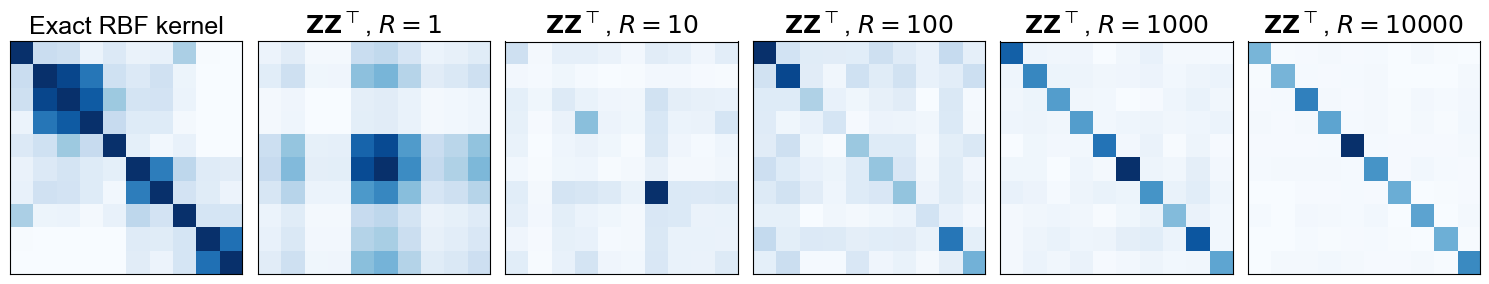

In [24]:
fig, axes = plt.subplots(1, 6)
fig.set_size_inches(15, 4)
font = {'fontname': 'arial', 'fontsize': 18}

N = 1000
D = 10

# randomly generate a distribution mean and std
true_q_mean = np.ones(D)
true_k_mean = np.ones(D)

# generate positive semi-definite matrices
rand_q = np.random.rand(D, D) 
true_q_cov = np.dot(rand_q, rand_q.T)
rand_k = np.random.rand(D, D)
true_k_cov = np.dot(rand_k, rand_k.T)

# generate matrices
Q = generate_gaussian(true_q_mean, true_q_cov, N)
K = generate_gaussian(true_k_mean, true_k_cov, N)

# calculate the sample means and covariance matrices
q_mean = np.mean(Q)
k_mean = np.mean(K)
q_cov = np.cov(Q, rowvar=False)
k_cov = np.cov(K, rowvar=False)

# calculate the norm approximation
q_norm_sqr = squared_norm_approximation(q_mean, q_cov)
k_norm_sqr = squared_norm_approximation(k_mean, k_cov)

# The RBF kernel is the Gaussian kernel if we let \gamma = 1 / (2 \sigma^2).
X, t = make_s_curve(D, noise=0.1)
X    = X[t.argsort()]
kernel = rbf_kernel(X, gamma=1/2.)

axes[0].imshow(kernel, cmap=plt.cm.Blues)
axes[0].set_title('Exact RBF kernel', **font)
axes[0].set_xticks([])
axes[0].set_yticks([])

w_mean = np.zeros(D)
w_cov = np.eye(D)
for R, ax in zip([1, 10, 100, 1000, 10000], axes[1:]):
    W = np.random.multivariate_normal(w_mean, w_cov, R)
    phi_q = apply_approximation(q_mean.T, W, q_norm_sqr)
    phi_k = apply_approximation(k_mean.T, W, k_norm_sqr)
    ZZ   = phi_q.T @ phi_k

    ax.imshow(ZZ, cmap=plt.cm.Blues, vmin=np.min(ZZ), vmax=np.max(ZZ))
    ax.set_title(r'$\mathbf{Z} \mathbf{Z}^{\top}$, $R=%s$' % R, **font)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

***Change Sigma_q, Sigma_k to constants***

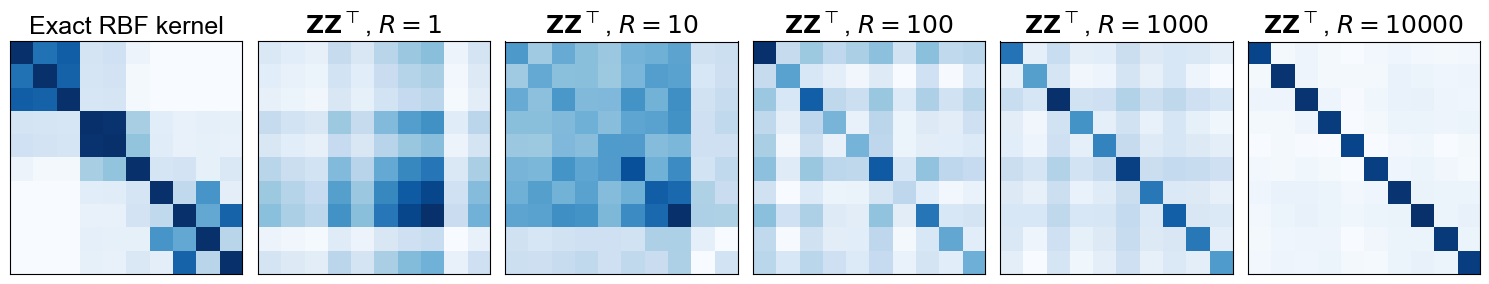

In [26]:
fig, axes = plt.subplots(1, 6)
fig.set_size_inches(15, 4)
font = {'fontname': 'arial', 'fontsize': 18}

N = 1000
D = 10

# randomly generate a distribution mean and std
true_q_mean = np.random.uniform(0, 1, D)
true_k_mean = np.random.uniform(0, 1, D)

# generate positive semi-definite matrices
rand_q = np.eye(D)*3
true_q_cov = np.dot(rand_q, rand_q.T)
rand_k = np.eye(D)*3
true_k_cov = np.dot(rand_k, rand_k.T)

# generate matrices
Q = generate_gaussian(true_q_mean, true_q_cov, N)
K = generate_gaussian(true_k_mean, true_k_cov, N)

# calculate the sample means and covariance matrices
q_mean = np.mean(Q)
k_mean = np.mean(K)
q_cov = np.cov(Q, rowvar=False)
k_cov = np.cov(K, rowvar=False)

# calculate the norm approximation
q_norm_sqr = squared_norm_approximation(q_mean, q_cov)
k_norm_sqr = squared_norm_approximation(k_mean, k_cov)

# The RBF kernel is the Gaussian kernel if we let \gamma = 1 / (2 \sigma^2).
X, t = make_s_curve(D, noise=0.1)
X    = X[t.argsort()]
kernel = rbf_kernel(X, gamma=1/2.)

axes[0].imshow(kernel, cmap=plt.cm.Blues)
axes[0].set_title('Exact RBF kernel', **font)
axes[0].set_xticks([])
axes[0].set_yticks([])

w_mean = np.zeros(D)
w_cov = np.eye(D)
for R, ax in zip([1, 10, 100, 1000, 10000], axes[1:]):
    W = np.random.multivariate_normal(w_mean, w_cov, R)
    phi_q = apply_approximation(q_mean.T, W, q_norm_sqr)
    phi_k = apply_approximation(k_mean.T, W, k_norm_sqr)
    ZZ   = phi_q.T @ phi_k

    ax.imshow(ZZ, cmap=plt.cm.Blues, vmin=np.min(ZZ), vmax=np.max(ZZ))
    ax.set_title(r'$\mathbf{Z} \mathbf{Z}^{\top}$, $R=%s$' % R, **font)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()